In [17]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import walk
from td import td_on_policy_prediction

In [18]:
env = gym.make('RandomWalk-v0')
policy = np.ones([env.observation_space.n, env.action_space.n], dtype=np.float)
size = env.observation_space.n

n = 4
history0 = td_on_policy_prediction(env, policy, n=n, num_episodes=10,
                                   alpha=0.1, tderr=False)
history1 = td_on_policy_prediction(env, policy, n=n, num_episodes=10,
                                   alpha=0.1, tderr=True)

<ipython-input-18-c5c832c84a5d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy = np.ones([env.observation_space.n, env.action_space.n], dtype=np.float)


In [19]:
history0

[array([0.45, 0.45, 0.45, 0.5 , 0.5 ]),
 array([0.405 , 0.3645, 0.405 , 0.5   , 0.5   ]),
 array([0.405   , 0.440245, 0.47305 , 0.55    , 0.55    ]),
 array([0.3645    , 0.3962205 , 0.4326705 , 0.48512205, 0.52926705]),
 array([0.32805   , 0.35659845, 0.38940345, 0.48512205, 0.52926705]),
 array([0.30021463, 0.30684435, 0.34046863, 0.45471208, 0.52926705]),
 array([0.30021463, 0.30684435, 0.37634033, 0.55831679, 0.61870631]),
 array([0.27019317, 0.27615991, 0.36051923, 0.47985259, 0.58685714]),
 array([0.25049026, 0.22368953, 0.31633796, 0.47985259, 0.58685714]),
 array([0.25049026, 0.22368953, 0.38470417, 0.53186733, 0.62817143])]

In [20]:
history1

[array([0.45, 0.4 , 0.35, 0.5 , 0.5 ]),
 array([0.45 , 0.4  , 0.611, 0.78 , 0.55 ]),
 array([0.405  , 0.176  , 0.35686, 0.78   , 0.55   ]),
 array([0.3645   , 0.07744  , 0.2709836, 0.78     , 0.55     ]),
 array([ 0.40159754,  0.0340736 ,  0.45456394, -0.62512   ,  0.34595   ]),
 array([ 0.40159754,  0.0340736 ,  0.61819476, -0.300096  ,  0.411355  ]),
 array([ 0.40159754,  0.16647526,  0.64172684, -0.0400768 ,  0.4702195 ]),
 array([0.40159754, 0.04254403, 0.67374556, 0.54236621, 0.52319755]),
 array([0.24899048, 0.01871937, 0.27640945, 0.54236621, 0.52319755]),
 array([ 0.39333262,  0.43301533,  0.45411297, -0.24164454,  0.5708778 ])]

In [21]:
v_star = np.arange(1, size + 1) / (size + 1)

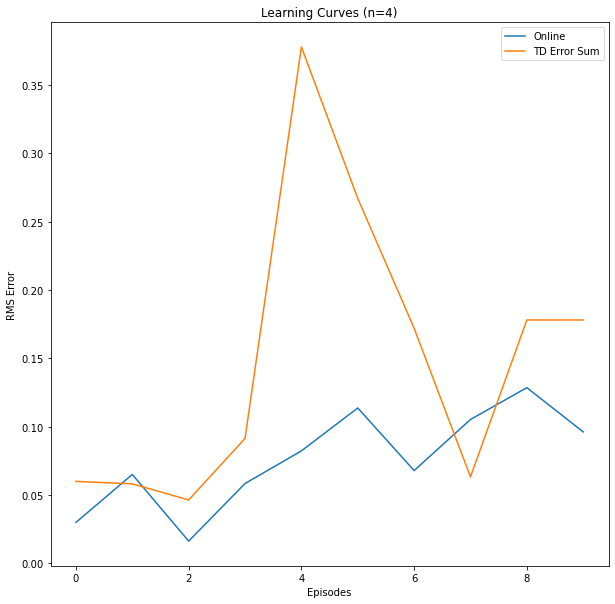

In [22]:
plt.figure()
plt.title(f"Learning Curves (n={n})")
plt.xlabel("Episodes")
plt.ylabel("RMS Error")
rms0 = np.sqrt((np.mean(history0 - v_star, axis=1) ** 2))
rms1 = np.sqrt((np.mean(history1 - v_star, axis=1) ** 2))
plt.plot(rms0, label='Online')
plt.plot(rms1, label='TD Error Sum')
plt.legend()
plt.show()

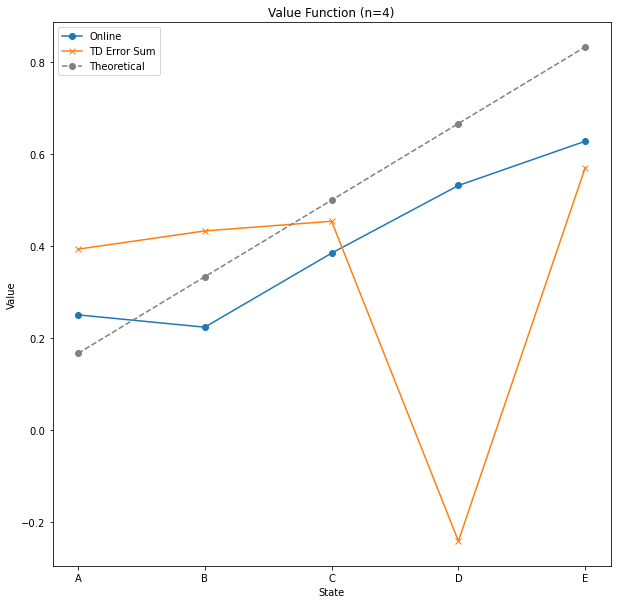

In [23]:
plt.figure()
plt.title(f"Value Function (n={n})")
plt.xlabel("State")
plt.ylabel("Value")
plt.xticks(range(size + 1), [chr(ord('A') + i) for i in range(size + 1)])
plt.plot(history0[-1], 'o-', label='Online')
plt.plot(history1[-1], 'x-', label='TD Error Sum')
plt.plot(v_star, 'o--', color='gray', label='Theoretical')
plt.legend()
plt.show()

In [24]:
ns = [2, 4, 8]
alphas = np.linspace(0, 0.5, num=20)
rms10int0 = np.zeros([len(ns), len(alphas)])
rms10int1 = np.zeros([len(ns), len(alphas)])

for i, n in enumerate(ns):
    for j, alpha in enumerate(alphas):
        env.seed(7)
        history0 = td_on_policy_prediction(env, policy, n=n, num_episodes=10,
                                           alpha=alpha, tderr=False)
        rmsint0 = np.sqrt((history0 - v_star) ** 2).mean()
        rms10int0[i, j] = rmsint0

        env.seed(7)
        history1 = td_on_policy_prediction(env, policy, n=n, num_episodes=10,
                                           alpha=alpha, tderr=True)
        rmsint1 = np.sqrt((history1 - v_star) ** 2).mean()
        rms10int1[i, j] = rmsint1

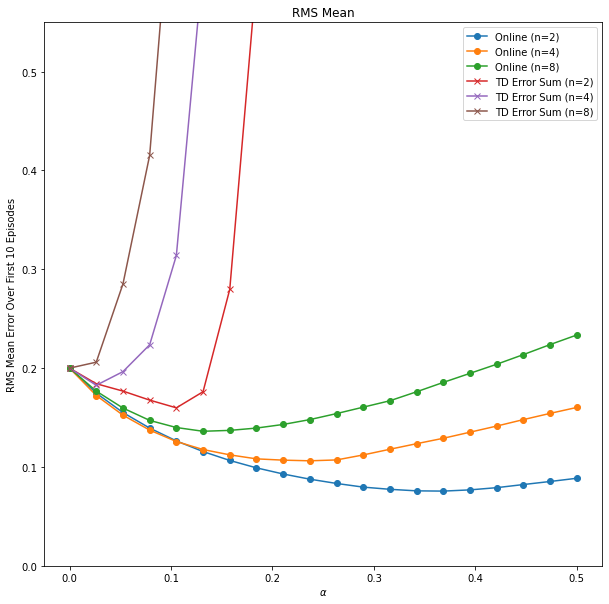

In [25]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure()
plt.title(f"RMS Mean")
plt.xlabel(r"$\alpha$"); plt.ylim([0, 0.55])
plt.ylabel("RMS Mean Error Over First 10 Episodes")
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int0[i, :], 'o-', label=f'Online (n={n})')
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int1[i, :], 'x-', label=f'TD Error Sum (n={n})')
plt.legend(loc=0)
plt.show()